In [5]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import pickle

# Facility Locations from hospitals

In [ ]:
Nepal_pois = ox.pois_from_place(place='Nepal')

In [ ]:
pickle.dump( Nepal_pois, open( "nepal_pois.p", "wb" ) )

In [116]:
Nepal_pois = pickle.load( open( "TestBooks/nepal_pois.p", "rb" ) )


In [129]:
Nepal_pois.shape

(32434, 623)

In [128]:
Nepal_pois.type

31232256            Point
245753718           Point
253422474           Point
267661433           Point
267666486           Point
267679554           Point
268308551           Point
268310351           Point
269103220           Point
276579599           Point
279339393           Point
279373682           Point
279373683           Point
279373684           Point
279374586           Point
279374591           Point
279374912           Point
279376292           Point
279376624           Point
279376643           Point
295063011           Point
297420323           Point
313140391           Point
317022976           Point
336901813           Point
336922579           Point
336927387           Point
336931032           Point
336939530           Point
349410029           Point
                 ...     
2805982      MultiPolygon
2805994      MultiPolygon
2818254      MultiPolygon
2844621      MultiPolygon
2844622      MultiPolygon
2927139      MultiPolygon
3014916      MultiPolygon
3303719     

In [79]:
Nepal_pois.amenity.value_counts().head(5)


school              9945
place_of_worship    3922
restaurant          2884
bank                1885
pharmacy             942
Name: amenity, dtype: int64

In [12]:
nepal_hospitals = Nepal_pois [Nepal_pois.amenity =='hospital']

In [25]:
nepal_hospitals = nepal_hospitals[nepal_hospitals.element_type == 'node']

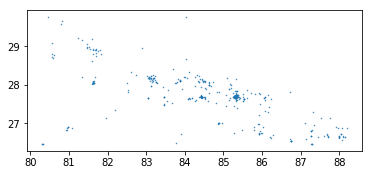

In [33]:
nepal_hospitals.plot(markersize=0.2)

In [29]:
hospital_coordinates = pd.DataFrame([point.coords[0] for point in pd.Series(nepal_hospitals.geometry)],columns=["longitude","latitude"])

In [32]:
hospital_coordinates.to_csv("Data/Nepal_Prepared_Data/hospital.csv")

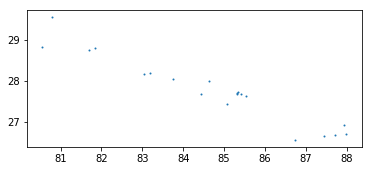

In [69]:
sample = nepal_hospitals.sample(20)
sample.plot(markersize=1)

In [70]:
sample_coordinates = pd.DataFrame([point.coords[0] for point in pd.Series(sample.geometry)],columns=["longitude","latitude"])

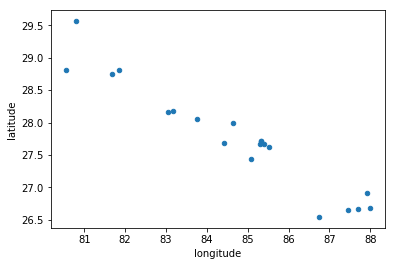

In [76]:
sample_coordinates.plot('longitude', 'latitude', kind='scatter',)

In [78]:
sample_coordinates.to_csv("Data/Nepal_Prepared_Data/sample_hospitals.csv", index=False)

# Plot on map

In [81]:
import folium

In [194]:
NPCOORD = [28.3, 84.12]

In [195]:
sample_coords = hospital_coordinates[['latitude', 'longitude']].values

In [196]:
map_nepal = folium.Map(
    location=NPCOORD, zoom_start=6, tiles='cartodbpositron')

In [197]:
[
    folium.CircleMarker(
        sample_coords[i], radius=0.5, color='#0080bb',
        fill_color='#0080bb').add_to(map_nepal)
    for i in range(len(sample_coords))
]
print("done")

done


In [188]:
sampleline = sample_coords[0:2]

In [192]:
sampleline[:4]

[(27.7057106, 85.3140863),
 (26.8381, 80.9346001),
 (27.6842564, 85.301107),
 (27.6850364, 85.3021077)]

In [202]:
test_line

[(87.28, 26.46), (87.9266972, 26.909188699999998)]

In [190]:
sampleline = [(a,b) for a,b in sample_coords]

In [198]:
test_line = [(87.28, 26.46), (87.9266972, 26.909188699999998)]

In [200]:
folium.PolyLine(
    test_line, color="red", weight=0.5, opacity=0.2).add_to(map_nepal)

In [201]:
map_nepal